# Classification (supervised learning)
Carlos Adrián Palimeri Álvarez A01635776

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [216]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [217]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [218]:
# Print dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [219]:
# Print dataset shape
dataset.shape

(150, 5)

In [220]:
# Print column names
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [221]:
# Check how many values are missing (NaN) in the dataset
print(dataset.isnull().sum())


# Drop na
dataset = dataset.dropna()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Flower          0
dtype: int64


3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

# Saving the dictionary encoding for the flowers
flower_names = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

#Visualize the dataset
dataset

C:\Users\palmi\AppData\Local\Temp\ipykernel_42352\1050431820.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [223]:
# Drop out non necesary columns


5. Scatter plot of the data

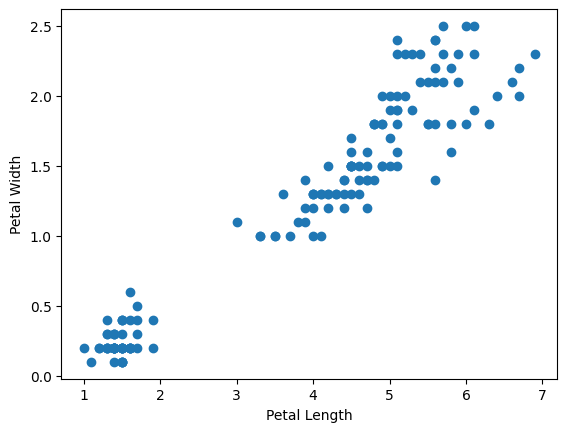

In [224]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


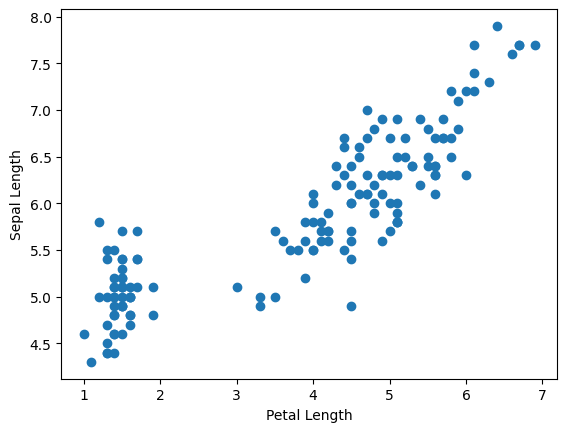

In [225]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()



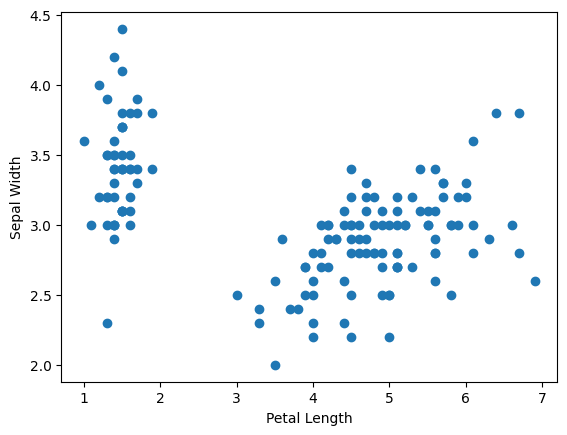

In [226]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


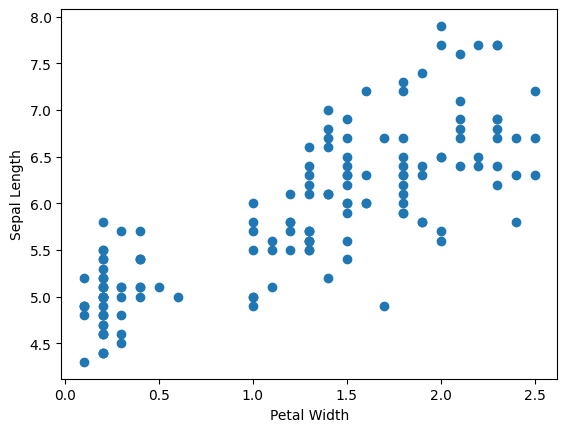

In [227]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

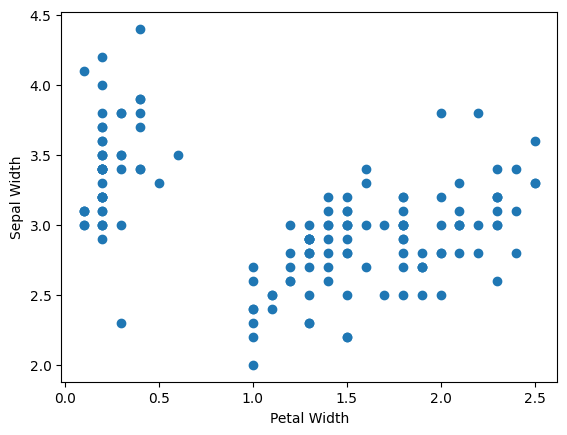

In [228]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

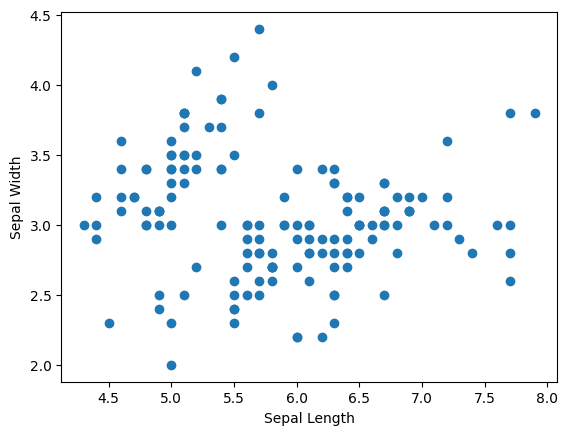

In [229]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


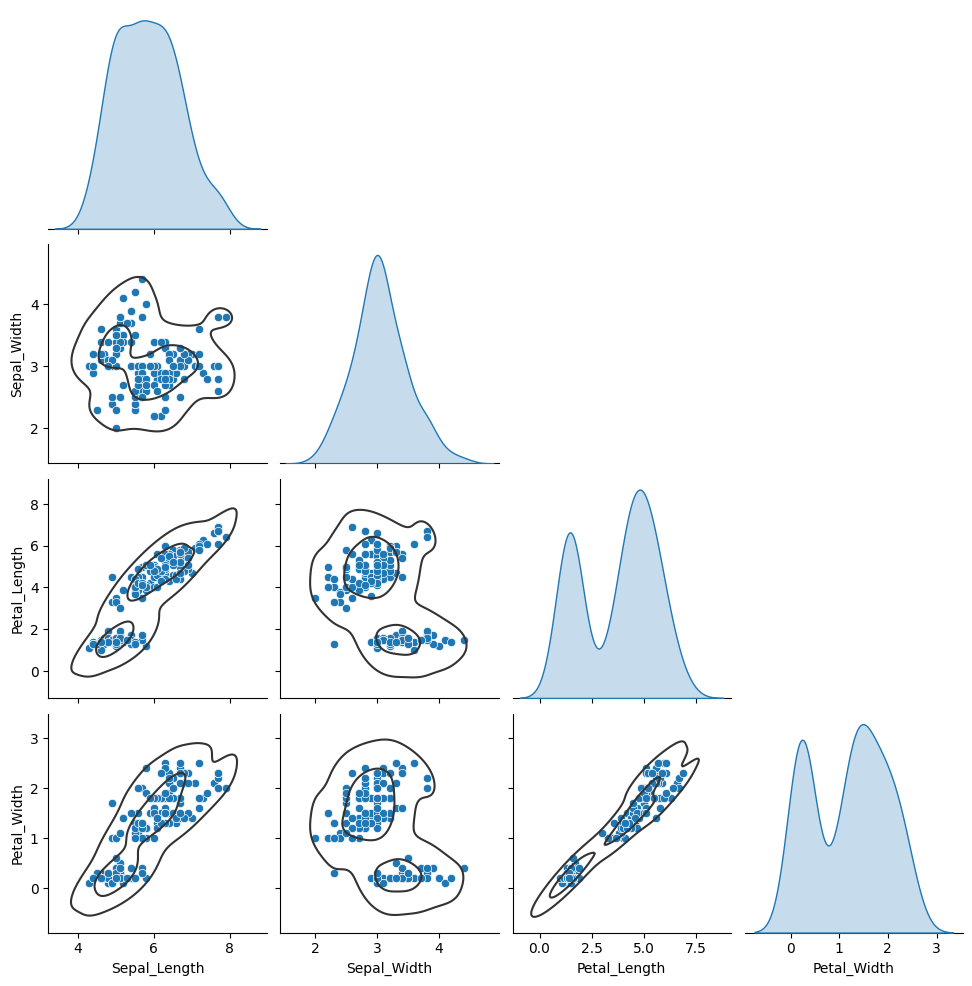

In [230]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()


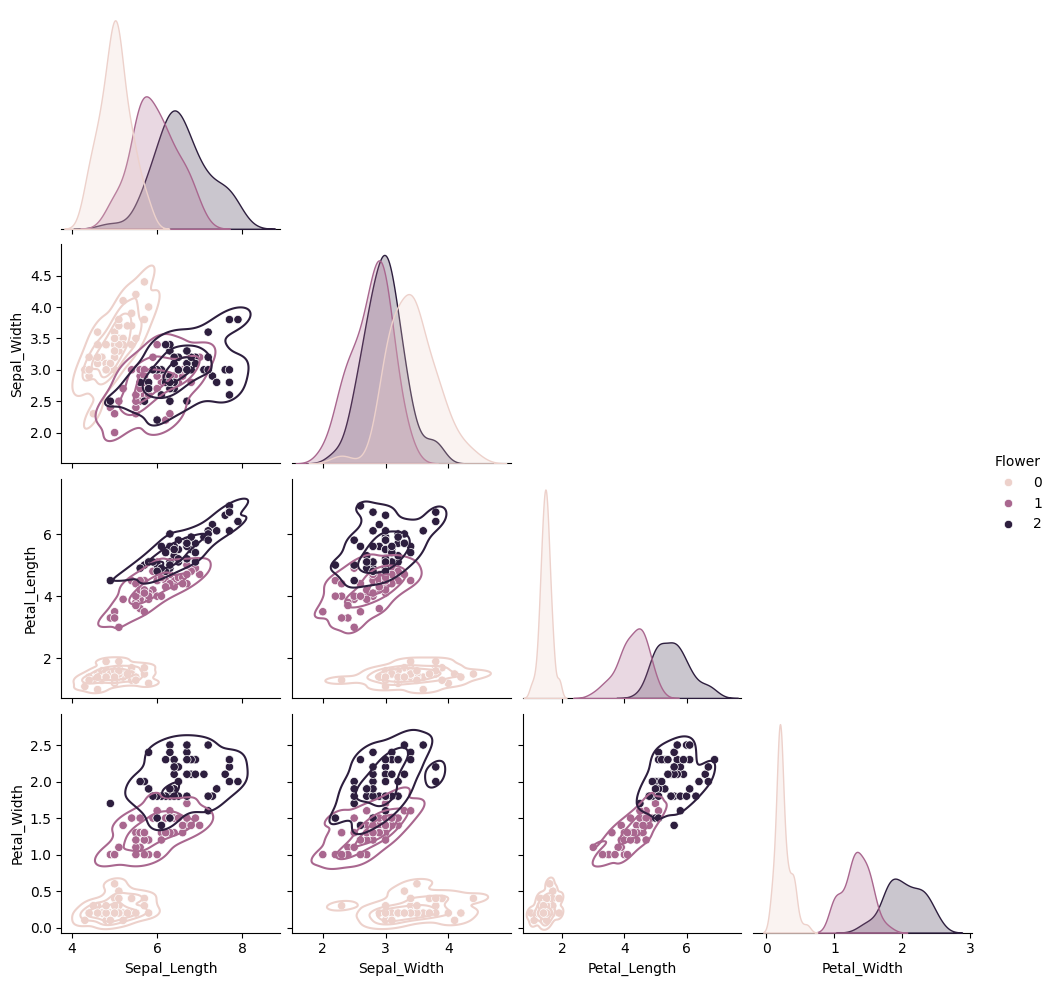

In [231]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [232]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]


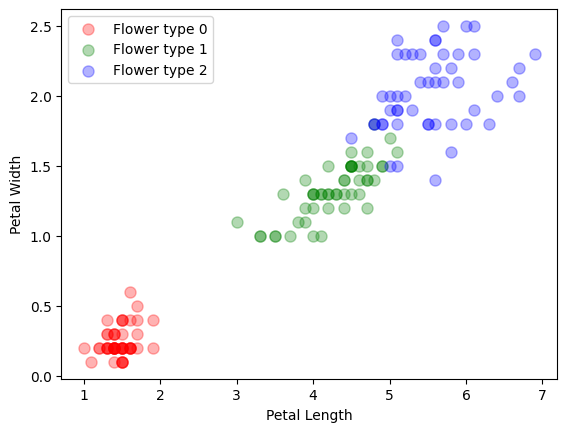

In [233]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()



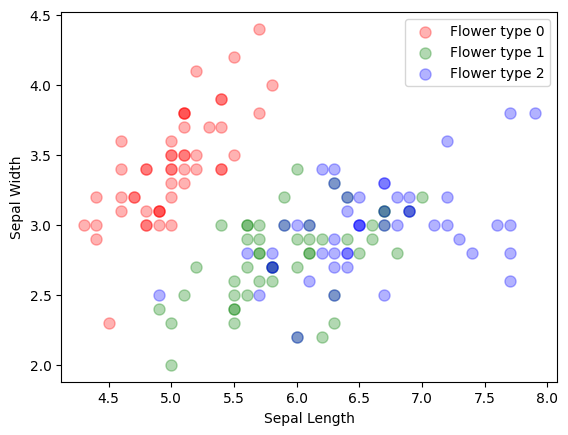

In [234]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [235]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values



In [236]:
# Understand the data X
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [237]:
# Understand the data y
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [238]:
# Calculate the number of observations in the dataset
print("The number of observations or rows are: ",X.shape[0])

The number of observations or rows are:  150


In [239]:
# Calculate the number of observations for class 0
print("The number of observations for class 0 are: ", y[y==0].shape[0])

The number of observations for class 0 are:  50


In [240]:
# Calculate the number of observations for class 1
print("The number of observations for class 1 are: ", y[y==1].shape[0])

The number of observations for class 1 are:  50


In [241]:
# Calculate the number of observations for class 2
print("The number of observations for class 2 are: ", y[y==2].shape[0])


The number of observations for class 2 are:  50


# Train a classifier

## Train the classification model

In [242]:
# Import sklearn linear_model
from sklearn import linear_model

# Initialize the classifier
logreg = linear_model.LogisticRegression()

# Fit the model to the training data
logreg.fit(X, y)


LogisticRegression()

## Predict the class of a new observation

In [243]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [244]:
# Make the prediction using xnew
ynew = logreg.predict(xnew)

# Get the predicted class
print("The predicted class is: ", ynew[0], "which corresponds to the type of flower:", flower_names[ynew[0]])

The predicted class is:  0 which corresponds to the type of flower: Iris-setosa


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [245]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [246]:
# Number of observations in the train set
print(X_train.shape)


(105, 4)


In [247]:
# Number of observations of each class in the train set
print("The number of observations for class 0 in the train set are: ", y_train[y_train==0].shape[0])
print("The number of observations for class 1 in the train set are: ", y_train[y_train==1].shape[0])
print("The number of observations for class 2 in the train set are: ", y_train[y_train==2].shape[0])

The number of observations for class 0 in the train set are:  34
The number of observations for class 1 in the train set are:  32
The number of observations for class 2 in the train set are:  39


In [248]:
# Number of observations in the test set
print(X_test.shape)

(45, 4)


In [249]:
# Number of observations of each class in the test set
print("The number of observations for class 0 in the test set are: ", y_test[y_test==0].shape[0])
print("The number of observations for class 1 in the test set are: ", y_test[y_test==1].shape[0])
print("The number of observations for class 2 in the test set are: ", y_test[y_test==2].shape[0])

The number of observations for class 0 in the test set are:  16
The number of observations for class 1 in the test set are:  18
The number of observations for class 2 in the test set are:  11


## Train the classification model

In [250]:
# Initialize the classifier
logreg = linear_model.LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

## Test the classification model

In [251]:
# Make the predictions using the test set
y_pred = logreg.predict(X_test)

In [252]:
# Explore real and predicted labels
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


## Compute the acurracy

In [253]:
# Define a function to compute accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [254]:
# Calculate total accuracy
print("The accuracy of the model is: ", accuracy(y_test, y_pred))

The accuracy of the model is:  0.9777777777777777


In [255]:
# Calculate total accuracy using sklearn.metrics
from sklearn import metrics

In [256]:
# Compute accuracy for class 0
print("The accuracy for class 0 is: ", metrics.accuracy_score(y_test[y_test==0], y_pred[y_test==0]))

The accuracy for class 0 is:  1.0


In [257]:
# Compute accuracy for class 1
print("The accuracy for class 1 is: ", metrics.accuracy_score(y_test[y_test==1], y_pred[y_test==1]))

The accuracy for class 1 is:  0.9444444444444444


In [258]:
# Compute accuracy for class 2
print("The accuracy for class 2 is: ", metrics.accuracy_score(y_test[y_test==2], y_pred[y_test==2]))

The accuracy for class 2 is:  1.0


## Confussion matrix

In [259]:
# Compute confussion matrix (normalized confusion matrix)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

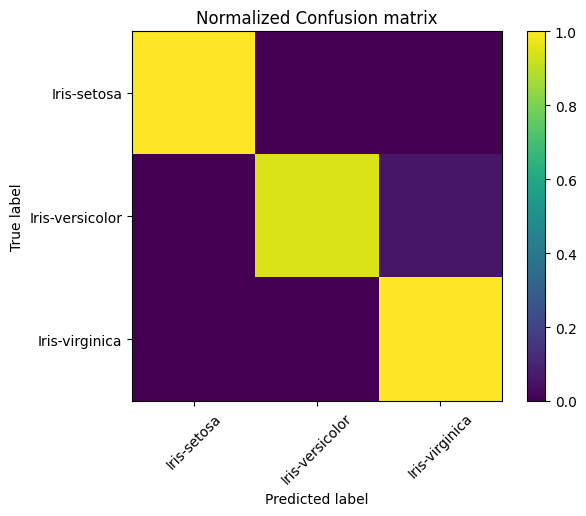

In [260]:
# Plot normalized confussion matrix
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("Normalized Confusion matrix")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, flower_names.values(), rotation=45)
plt.yticks(tick_marks, flower_names.values())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

## Comparation using different variables

### LogisticRegression using Petal variables

In [261]:
# Logistic Regression using the two Petal variables
# Select variables (one, two, three, four)
X = dataset[['Petal_Length', 'Petal_Width']].values
print(X)

y = dataset['Flower'].values
print(y)

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [262]:
# Initialize the classifier
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()

In [263]:
# Make the predictions using the test set
y_pred = logreg.predict(X_test)

In [264]:
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [265]:
# Getting a new observation to test
xnew = np.array([[5.5, 2.5]])
print(xnew)

[[5.5 2.5]]


In [266]:
ynew = logreg.predict(xnew)

print("The predicted class is: ", ynew[0], "which corresponds to the type of flower:", flower_names[ynew[0]])


The predicted class is:  2 which corresponds to the type of flower: Iris-virginica


In [267]:
#Evaluating the model
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [268]:
# Calculate total accuracy
print("The accuracy of the model is: ", accuracy(y_test, y_pred))

The accuracy of the model is:  0.9777777777777777


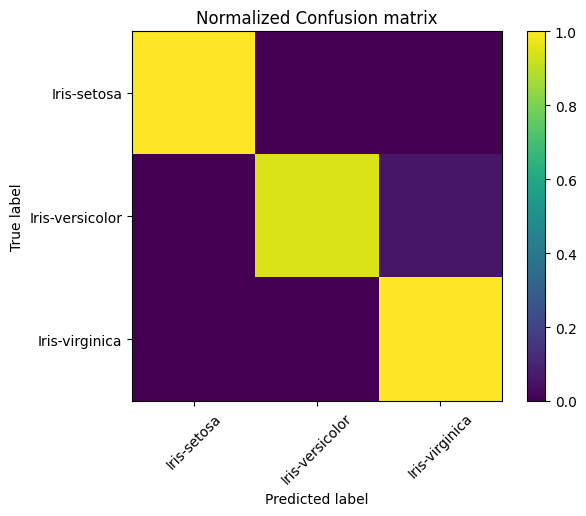

In [269]:
# Compute confussion matrix (normalized confusion matrix)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confussion matrix
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("Normalized Confusion matrix")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, flower_names.values(), rotation=45)
plt.yticks(tick_marks, flower_names.values())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



### LogisticRegression using Sepal Variables

In [270]:
# Logistic Regression using the two Sepal variables
X = dataset[['Sepal_Length', 'Sepal_Width']].values
print(X)

y = dataset['Flower'].values
print(y)

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [271]:
# Initialize the classifier
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [272]:
# Make the predictions using the test set
y_pred = logreg.predict(X_test)

In [273]:
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [274]:
# Getting a new observation to test
xnew = np.array([[5.5, 2.5]])
print(xnew)

[[5.5 2.5]]


In [275]:
ynew = logreg.predict(xnew)

print("The predicted class is: ", ynew[0], "which corresponds to the type of flower:", flower_names[ynew[0]])


The predicted class is:  1 which corresponds to the type of flower: Iris-versicolor


In [276]:
#Evaluating the model
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [277]:
# Calculate total accuracy
print("The accuracy of the model is: ", accuracy(y_test, y_pred))

The accuracy of the model is:  0.8222222222222222


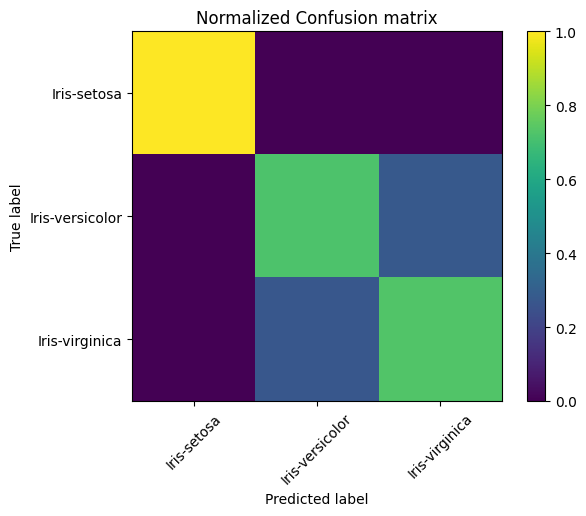

In [278]:
# Compute confussion matrix (normalized confusion matrix)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confussion matrix
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("Normalized Confusion matrix")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, flower_names.values(), rotation=45)
plt.yticks(tick_marks, flower_names.values())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



The classifier has the same accuracy using the four variables and using the only the Petal_Length and Petal_Width, which means that using less information (Only using two variables) we can make a more efficiente model.

Using Sepal Length And Sepal Width we have a less value for accuracy and by seeing the graphs of correlations we can intuit that those variables are not to correlated

## Trying two Classifiers

In [296]:
# Trying Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0)

In [297]:
# extracting again the data
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values

y = dataset["Flower"].values

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [298]:
# Making the predictions using the test set
y_pred = rf.predict(X_test)

In [299]:
# Printing the real and predicted labels
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [300]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [301]:
#Calculate total accuracy
print("The accuracy of the model is: ", accuracy(y_test, y_pred))

The accuracy of the model is:  0.9777777777777777


In [302]:
print("The accuracy for class 0 is: ", metrics.accuracy_score(y_test[y_test==0], y_pred[y_test==0]))
print("The accuracy for class 1 is: ", metrics.accuracy_score(y_test[y_test==1], y_pred[y_test==1]))
print("The accuracy for class 2 is: ", metrics.accuracy_score(y_test[y_test==2], y_pred[y_test==2]))

The accuracy for class 0 is:  1.0
The accuracy for class 1 is:  0.9444444444444444
The accuracy for class 2 is:  1.0


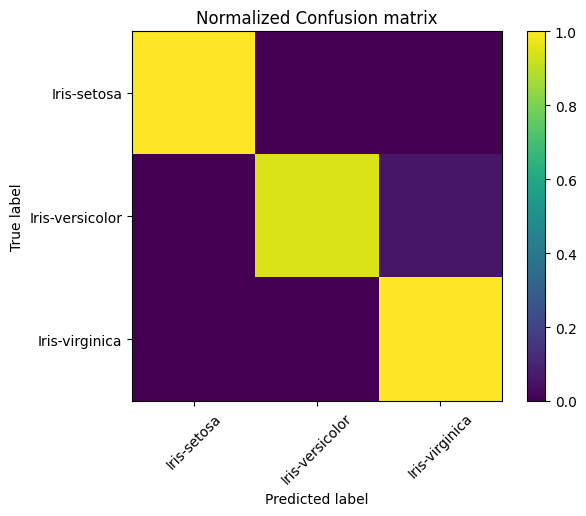

In [303]:
# Compute confussion matrix (normalized confusion matrix)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confussion matrix
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("Normalized Confusion matrix")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, flower_names.values(), rotation=45)
plt.yticks(tick_marks, flower_names.values())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


### Using AdaBoost with cross validation

In [354]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

# Initialize the classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

# Initialize the KFold parameters
kf5 = KFold(n_splits=5, random_state=0, shuffle=True)
kf10 = KFold(n_splits=10, random_state=0, shuffle=True)

In [355]:
X = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
y = dataset["Flower"].values

In [356]:
# Perform the cross validation
scores5 = cross_val_score(ada, X, y, cv=kf5)
scores10 = cross_val_score(ada, X, y, cv=kf10)


In [357]:
# Print the scores of the cross validation
print("Scores for 5 splits: ", scores5)
# Print the mean of the scores
print("The mean of the scores for 5 splits: ", scores5.mean())


# Print the scores of the cross validation
print("\nScores for 10 splits: ", scores10)
# Print the mean of the scores
print("The mean of the scores for 10 splits: ", scores10.mean())




Scores for 5 splits:  [1.         0.9        0.96666667 1.         0.9       ]
The mean of the scores for 5 splits:  0.9533333333333334

Scores for 10 splits:  [1.         1.         0.93333333 0.8        1.         0.93333333
 0.93333333 0.93333333 0.86666667 0.93333333]
The mean of the scores for 10 splits:  0.9333333333333333
